# results

In [1]:
# import subprocess
import pandas as pd
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
# import metrics

## shapenet & modelnet

In [3]:
# modelnet_csvs = sorted(glob.glob('results/GPCC/trisoup/ModelNet/*.csv'))
# modelnet_average = average_csvs(modelnet_csvs)
# modelnet_average.to_csv('results/GPCC/trisoup/ModelNet/average.csv', index=False)

# Comparison

In [4]:
vox = 10

In [5]:
vpcc_csvs = sorted(glob.glob('results/VPCC/*vox'+str(vox)+'*.csv'))
gpcc_octree_csvs = sorted(glob.glob('results/GPCC/octree/*vox'+str(vox)+'*.csv'))
gpcc_trisoup_csvs = sorted(glob.glob('results/GPCC/trisoup/*vox'+str(vox)+'*.csv'))
pcl_csvs = sorted(glob.glob('results/PCL/*vox'+str(vox)+'*.csv'))
learnedpcgc_csvs = sorted(glob.glob('results/hyper/*vox'+str(vox)+'*.csv'))

In [6]:
print(vpcc_csvs, '\n', gpcc_octree_csvs, '\n', gpcc_trisoup_csvs, '\n', pcl_csvs, '\n', learnedpcgc_csvs)

['results/VPCC/longdress_vox10_1300.csv', 'results/VPCC/loot_vox10_1200.csv', 'results/VPCC/queen_vox10_0200.csv', 'results/VPCC/redandblack_vox10_1550.csv', 'results/VPCC/ricardo_vox10_frame0082.csv', 'results/VPCC/soldier_vox10_0690.csv'] 
 ['results/GPCC/octree/longdress_vox10_1300.csv', 'results/GPCC/octree/loot_vox10_1200.csv', 'results/GPCC/octree/queen_vox10_0200.csv', 'results/GPCC/octree/redandblack_vox10_1550.csv', 'results/GPCC/octree/ricardo_vox10_frame0082.csv', 'results/GPCC/octree/soldier_vox10_0690.csv'] 
 ['results/GPCC/trisoup/longdress_vox10_1300.csv', 'results/GPCC/trisoup/loot_vox10_1200.csv', 'results/GPCC/trisoup/queen_vox10_0200.csv', 'results/GPCC/trisoup/redandblack_vox10_1550.csv', 'results/GPCC/trisoup/ricardo_vox10_frame0082.csv', 'results/GPCC/trisoup/soldier_vox10_0690.csv'] 
 ['results/PCL/longdress_vox10_1300.ply.csv', 'results/PCL/loot_vox10_1200.ply.csv', 'results/PCL/queen_vox10_0200.ply.csv', 'results/PCL/redandblack_vox10_1550.ply.csv', 'results/PC

In [7]:
idx = 0

In [8]:
flag = 'd1'
# flag = 'd2'

if flag == 'd1':
    postfix = '_d1'
    metric = 'mseF,PSNR (p2point)'
    metric1 =  'optimal D1 PSNR'
    ylabel = "D1 PSNR (dB)"
elif flag == 'd2':
    postfix = '_d2'
    metric = 'mseF,PSNR (p2plane)'
    metric1 =  'optimal D2 PSNR'
    ylabel = "D2 PSNR (dB)"

In [9]:
vpcc_csv = vpcc_csvs[idx]
print(vpcc_csv)
vpcc = pd.read_csv(vpcc_csv)

gpcc_octree_csv = gpcc_octree_csvs[idx]
print(gpcc_octree_csv)
gpcc_octree = pd.read_csv(gpcc_octree_csv)
# gpcc_octree = gpcc_octree[1:-1]

gpcc_trisoup_csv = gpcc_trisoup_csvs[idx]
print(gpcc_trisoup_csv)
gpcc_trisoup = pd.read_csv(gpcc_trisoup_csv)

pcl_csv = pcl_csvs[idx]
print(pcl_csv)
pcl = pd.read_csv(pcl_csv)

learnedpcgc_csv = learnedpcgc_csvs[idx]
print(learnedpcgc_csv)
learnedpcgc = pd.read_csv(learnedpcgc_csv)
# learnedpcgc = learnedpcgc[-5:]

results/VPCC/longdress_vox10_1300.csv
results/GPCC/octree/longdress_vox10_1300.csv
results/GPCC/trisoup/longdress_vox10_1300.csv
results/PCL/longdress_vox10_1300.ply.csv
results/hyper/longdress_vox10_1300.csv


In [10]:
gpcc_octree = gpcc_octree[1:]
# gpcc_octree = gpcc_octree[2:]
pcl = pcl[1:-2]
# pcl = pcl[:-2]
learnedpcgc = learnedpcgc[:-1]

In [11]:
dataname = os.path.split(learnedpcgc_csv)[-1].split('.')[0].split('_')[0]
print(dataname)

longdress


In [12]:
# dataname = 'basketball_player'

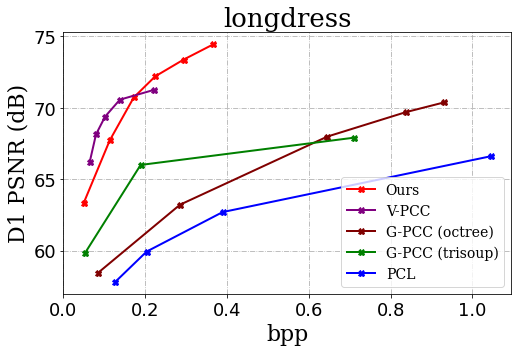

In [13]:
fig, ax = plt.subplots(figsize=(7.3,5))

A= plt.plot(learnedpcgc['bpp'], learnedpcgc[metric], 
            label = "Ours",color ="red",linewidth=2, marker='X')
B= plt.plot(vpcc['geometry bpp'], vpcc[metric], 
            label = "V-PCC",color ="purple",linewidth=2, marker='X',)
C= plt.plot(gpcc_octree['bpp'], gpcc_octree[metric], 
            label = "G-PCC (octree)",color ="#800000",linewidth=2, marker='X',)
D= plt.plot(gpcc_trisoup['bpp'], gpcc_trisoup[metric], 
            label = "G-PCC (trisoup)",color ="green",linewidth=2, marker='X',)
E= plt.plot(pcl['bpp'], pcl[metric], 
            label = "PCL",color ="blue",linewidth=2, marker='X',)
# 'style':'italic',
font_label = {'family' : 'serif', 'weight' : 'normal', 'size'   : 22}
font_title = {'family' : 'serif', 'weight' : 'normal', 'size'   : 26}
font_legend = {'family' : 'serif', 'weight' : 'normal', 'size'   : 14}
# ax.set_xlim([0, 2.0])
# ax.set_ylim([60, 75])
ax.locator_params(axis='x', nbins=8)

plt.tick_params(labelsize=18)
plt.xlabel("bpp",font_label)
plt.ylabel(ylabel,font_label)
plt.title(dataname, font_title)
plt.grid(ls='-.')
plt.legend(prop = font_legend, loc='lower right')
ax.locator_params(axis='x', nbins=8)

fig.tight_layout()
fig.savefig('./results/' + dataname + ylabel.split(' ')[0] + '.pdf')

## BD-Rate

In [14]:
from myutils import bdrate_metrics

def points_for_bdrate(df, index_rate='bpp', index_psnr='mseF,PSNR (p2point)'):
    rate = df[index_rate]
    psnr = df[index_psnr]
    rd_points = [tuple((a, b)) for a, b in zip(rate, psnr)]
    return rd_points

In [15]:
rd_points_learnedpcgc = points_for_bdrate(learnedpcgc, 'bpp', metric1)
# rd_points_learnedpcgc_f = points_for_bdrate(learnedpcgc_f, 'bpp', metric)
rd_points_gpcc_octree = points_for_bdrate(gpcc_octree, 'bpp', metric)
rd_points_gpcc_trisoup = points_for_bdrate(gpcc_trisoup, 'bpp', metric)
rd_points_vpcc = points_for_bdrate(vpcc, 'geometry bpp', metric)
rd_points_pcl = points_for_bdrate(pcl, 'bpp', metric)

In [16]:
bdrate_vpcc = round(bdrate_metrics.bdrate(rd_points_vpcc, rd_points_learnedpcgc), 2)
print('vpcc', bdrate_vpcc)
bdrate_octree = round(bdrate_metrics.bdrate(rd_points_gpcc_octree, rd_points_learnedpcgc),2)
print('octree', bdrate_octree)
try:
    bdrate_trisoup = round(bdrate_metrics.bdrate(rd_points_gpcc_trisoup, rd_points_learnedpcgc),2)
except:
    print('LinAlgError')
    bdrate_trisoup=0
print('trisoup', bdrate_trisoup)
bdrate_pcl = round(bdrate_metrics.bdrate(rd_points_pcl, rd_points_learnedpcgc),2)
print('pcl', bdrate_pcl)
print(dataname)

vpcc 23.07
octree -84.16
trisoup -63.19
pcl -91.38
longdress


/home/ubuntu/anaconda3/envs/tf13/lib/python3.6/site-packages/ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  


In [26]:
# # voxel
# filenames = []
# bdrates_vpcc_d1 = []
# bdrates_octree_d1 = []
# bdrates_trisoup_d1 = []
# bdrates_pcl_d1 = []

# bdrates_vpcc_d2 = []
# bdrates_octree_d2 = []
# bdrates_trisoup_d2 = []
# bdrates_pcl_d2 = []

In [18]:
# filenames.append(dataname)
# bdrates_vpcc_d1.append(bdrate_vpcc)
# bdrates_octree_d1.append(bdrate_octree)
# bdrates_trisoup_d1.append(bdrate_trisoup)
# bdrates_pcl_d1.append(bdrate_pcl)

In [19]:
# print(filenames, '\n', 
#       bdrates_vpcc_d1, '\n', 
#       bdrates_octree_d1, '\n', 
#       bdrates_trisoup_d1, '\n', 
#       bdrates_pcl_d1)

In [20]:
filenames = ['basketball', 'dancer', 'exercise', 'model']
owlii_bdrates_vpcc_d1 =    [58.01, 74.79, 120.14, 128.56] 
owlii_bdrates_octree_d1 =    [-86.73, -85.01, -82.21, -76.7]  
owlii_bdrates_trisoup_d1 =   [0, 0, 0, 0] 
owlii_bdrates_pcl_d1 =   [-93.74, -92.51, -91.79, -88.39]

owlii_bdrates_vpcc_d2 =   [40.24, 37.68, 51.51, 61.87] 
owlii_bdrates_octree_d2 =  [-82.17, -80.96, -80.11, -73.01] 
owlii_bdrates_trisoup_d2 = [0, 0, 0, 0]  
owlii_bdrates_pcl_d2 =   [-91.71, -90.89, -90.88, -87.15]

In [21]:
filenames = ['ricardo', 'andrew', 'david', 'phil', 'sarah'] 
mvub_bdrates_vpcc_d1 =   [3.25, -7.25, -23.98, -18.57, -2.78] 
mvub_bdrates_octree_d1 =   [-82.15, -81.79, -79.86, -81.69, -81.39] 
mvub_bdrates_trisoup_d1 =  [0, 0, 0, 0, 0] 
mvub_bdrates_pcl_d1 =   [-89.89, -89.08, -87.77, -88.55, -89.22]

mvub_bdrates_vpcc_d2 =  [11.04, -9.55, -19.49, -21.5, -12.25] 
mvub_bdrates_octree_d2 =  [-70.11, -71.47, -72.92, -71.85, -73.18] 
mvub_bdrates_trisoup_d2 = [0, 0, 0, 0, 0]  
mvub_bdrates_pcl_d2 =  [-81.99, -82.27, -83.55, -81.96, -84.18]

In [22]:
filenames = ['longdress', 'loot', 'redandblack',  'queen', 'soldier'] 
eighti_bdrates_vpcc_d1 =  [23.07, 24.11, -0.47,  30.99, 3.64] 
eighti_bdrates_octree_d1 =  [-84.16, -83.62, -81.1,  -83.43, -83.93] 
eighti_bdrates_trisoup_d1 =  [-63.19, -66.02, -55.17,  0, -63.23] 
eighti_bdrates_pcl_d1 =  [-91.95, -92.03, -89.32,  -91.96, -91.25]

eighti_bdrates_vpcc_d2 = [5.86, 10.73, -21.77,  5.97, -10.03] 
eighti_bdrates_octree_d2 = [-77.27, -76.22, -76.68,  -77.72, -76.86] 
eighti_bdrates_trisoup_d2 = [-68.07, -64.43, -67.95,  0, -67.03] 
eighti_bdrates_pcl_d2 =[-88.03, -88.05, -87.33,  -88.88, -87.17]

In [23]:
print(round(np.mean(eighti_bdrates_pcl_d1+mvub_bdrates_pcl_d1+owlii_bdrates_pcl_d1),2))
print(round(np.mean(eighti_bdrates_octree_d1+mvub_bdrates_octree_d1+owlii_bdrates_octree_d1),2))
print(round(np.mean(eighti_bdrates_vpcc_d1+mvub_bdrates_vpcc_d1+owlii_bdrates_vpcc_d1),2))

-90.53
-82.41
29.54


In [24]:
print(round(np.mean(eighti_bdrates_pcl_d2+mvub_bdrates_pcl_d2+owlii_bdrates_pcl_d2),2))
print(round(np.mean(eighti_bdrates_octree_d2+mvub_bdrates_octree_d2+owlii_bdrates_octree_d2),2))
print(round(np.mean(eighti_bdrates_vpcc_d2+mvub_bdrates_vpcc_d2+owlii_bdrates_vpcc_d2),2))

-86.72
-75.75
9.31


## Sparse PC

In [27]:
vox = 12

In [28]:
vpcc_csvs = sorted(glob.glob('results/VPCC/*vox'+str(vox)+'*.csv'))
gpcc_octree_csvs = sorted(glob.glob('results/GPCC/octree/*vox'+str(vox)+'*.csv'))
gpcc_trisoup_csvs = sorted(glob.glob('results/GPCC/trisoup/*vox'+str(vox)+'*.csv'))
pcl_csvs = sorted(glob.glob('results/PCL/*vox'+str(vox)+'*.csv'))
learnedpcgc_csvs = sorted(glob.glob('results/hyper/*vox'+str(vox)+'*.csv'))

In [29]:
learnedpcgc_s1_csvs = sorted(glob.glob('results/hyper/sparse/scale1/csv/*.csv'))

In [30]:
print(vpcc_csvs, '\n', gpcc_octree_csvs, '\n', gpcc_trisoup_csvs, '\n', pcl_csvs, '\n', learnedpcgc_csvs)

['results/VPCC/Facade_00009_vox12.csv', 'results/VPCC/House_without_roof_00057_vox12.csv', 'results/VPCC/Shiva_00035_vox12.csv', 'results/VPCC/Staue_Klimt_vox12.csv'] 
 ['results/GPCC/octree/Facade_00009_vox12.csv', 'results/GPCC/octree/House_without_roof_00057_vox12.csv', 'results/GPCC/octree/Shiva_00035_vox12.csv', 'results/GPCC/octree/Staue_Klimt_vox12.csv'] 
 ['results/GPCC/trisoup/Facade_00009_vox12.csv', 'results/GPCC/trisoup/House_without_roof_00057_vox12.csv', 'results/GPCC/trisoup/Shiva_00035_vox12.csv', 'results/GPCC/trisoup/Staue_Klimt_vox12.csv'] 
 ['results/PCL/Facade_00009_vox12.ply.csv', 'results/PCL/House_without_roof_00057_vox12.ply.csv', 'results/PCL/Shiva_00035_vox12.ply.csv', 'results/PCL/Staue_Klimt_vox12.ply.csv'] 
 ['results/hyper/Facade_00009_vox12.csv', 'results/hyper/House_without_roof_00057_vox12.csv', 'results/hyper/Shiva_00035_vox12.csv', 'results/hyper/Staue_Klimt_vox12.csv']


In [31]:
print(learnedpcgc_s1_csvs)

['results/hyper/sparse/scale1/csv/Facade_00009_vox12.csv', 'results/hyper/sparse/scale1/csv/House_without_roof_00057_vox12.csv', 'results/hyper/sparse/scale1/csv/Shiva_00035_vox12.csv', 'results/hyper/sparse/scale1/csv/Staue_Klimt_vox12.csv']


In [32]:
flag = 'd1'
# flag = 'd2'

if flag == 'd1':
    postfix = '_d1'
    metric = 'mseF,PSNR (p2point)'
    metric1 =  'optimal D1 PSNR'
    ylabel = "D1 PSNR (dB)"
elif flag == 'd2':
    postfix = '_d2'
    metric = 'mseF,PSNR (p2plane)'
    metric1 =  'optimal D2 PSNR'
    ylabel = "D2 PSNR (dB)"

In [33]:
idx = 0

In [34]:
vpcc_csv = vpcc_csvs[idx]
print(vpcc_csv)
vpcc = pd.read_csv(vpcc_csv)

gpcc_octree_csv = gpcc_octree_csvs[idx]
print(gpcc_octree_csv)
gpcc_octree = pd.read_csv(gpcc_octree_csv)
# gpcc_octree = gpcc_octree[1:-1]

gpcc_trisoup_csv = gpcc_trisoup_csvs[idx]
print(gpcc_trisoup_csv)
gpcc_trisoup = pd.read_csv(gpcc_trisoup_csv)

pcl_csv = pcl_csvs[idx]
print(pcl_csv)
pcl = pd.read_csv(pcl_csv)

learnedpcgc_csv = learnedpcgc_csvs[idx]
print(learnedpcgc_csv)
learnedpcgc = pd.read_csv(learnedpcgc_csv)
# learnedpcgc = learnedpcgc[-5:]

results/VPCC/Facade_00009_vox12.csv
results/GPCC/octree/Facade_00009_vox12.csv
results/GPCC/trisoup/Facade_00009_vox12.csv
results/PCL/Facade_00009_vox12.ply.csv
results/hyper/Facade_00009_vox12.csv


In [35]:
learnedpcgc_s1_csv = learnedpcgc_s1_csvs[idx]
print(learnedpcgc_s1_csv)
learnedpcgc_s1 = pd.read_csv(learnedpcgc_s1_csv)

results/hyper/sparse/scale1/csv/Facade_00009_vox12.csv


In [36]:
dataname = os.path.split(learnedpcgc_csv)[-1].split('.')[0].split('_')[0]
print(dataname)
if dataname == "Staue":
    dataname = "Staue_Klimt"
if dataname == "House":
    dataname = "House_without_roof"

Facade


In [37]:
# gpcc_octree = gpcc_octree[1:-1]
# gpcc_trisoup = gpcc_tirsoup[:-1]
# pcl = pcl[:]
# pcl = pcl[:-2]
if dataname == "Facade":
    gpcc_octree = gpcc_octree[1:-1]
if dataname == "House_without_roof":
    gpcc_octree = gpcc_octree[2:-1]
    pcl = pcl[1:]
    learnedpcgc_s1 = learnedpcgc_s1[:]
if dataname == "Shiva":
    vpcc = vpcc[:-1]
    gpcc_octree = gpcc_octree[1:-1]
if dataname == "Staue_Klimt":
    vpcc = vpcc[:-1]
    gpcc_octree = gpcc_octree[1:-1]
    gpcc_trisoup = gpcc_trisoup[1:]

In [38]:
# learnedpcgc_s1 = learnedpcgc[:-1]

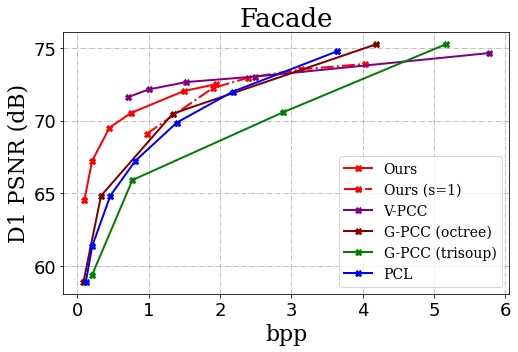

In [39]:
fig, ax = plt.subplots(figsize=(7.3,5))

A= plt.plot(learnedpcgc['bpp'], learnedpcgc[metric1], 
            label = "Ours",color ="red",linewidth=2, marker='X')
A= plt.plot(learnedpcgc_s1['bpp'], learnedpcgc_s1[metric1], 
            label = "Ours (s=1)",color ="red",linewidth=2, marker='X', linestyle='-.')

B= plt.plot(vpcc['geometry bpp'], vpcc[metric], 
            label = "V-PCC",color ="purple",linewidth=2, marker='X',)
C= plt.plot(gpcc_octree['bpp'], gpcc_octree[metric], 
            label = "G-PCC (octree)",color ="#800000",linewidth=2, marker='X',)
D= plt.plot(gpcc_trisoup['bpp'], gpcc_trisoup[metric], 
            label = "G-PCC (trisoup)",color ="green",linewidth=2, marker='X',)
E= plt.plot(pcl['bpp'], pcl[metric], 
            label = "PCL",color ="blue",linewidth=2, marker='X',)
# 'style':'italic',
font_label = {'family' : 'serif', 'weight' : 'normal', 'size'   : 22}
font_title = {'family' : 'serif', 'weight' : 'normal', 'size'   : 26}
font_legend = {'family' : 'serif', 'weight' : 'normal', 'size'   : 14}
# ax.set_xlim([0, 2.0])
# ax.set_ylim([60, 75])
ax.locator_params(axis='x', nbins=8)

plt.tick_params(labelsize=18)
plt.xlabel("bpp",font_label)
plt.ylabel(ylabel,font_label)
plt.title(dataname, font_title)
plt.grid(ls='-.')
plt.legend(prop = font_legend, loc='lower right')
ax.locator_params(axis='x', nbins=8)

fig.tight_layout()
fig.savefig('./results/' + dataname + ylabel.split(' ')[0] + '.pdf')

## ShapeNet & ModelNet

In [40]:
# # modelnet
# gpcc_octree_csv = 'results/GPCC/octree/ModelNet/average.csv'
# gpcc_trisoup_csv = 'results/GPCC/trisoup/ModelNet/average.csv'
# pcl_csv = 'results/PCL/ModelNet/average.csv'
# learnedpcgc_csv = 'results/hyper/modelnet/average.csv'
# dataname = "ModelNet"

# shapenet
gpcc_octree_csv = 'results/GPCC/octree/ShapeNet/average.csv'
gpcc_trisoup_csv = 'results/GPCC/trisoup/ShapeNet/average.csv'
pcl_csv = 'results/PCL/ShapeNet/average.csv'
learnedpcgc_csv = 'results/hyper/shapenet/average.csv'
dataname = "ShapeNet"

In [41]:
gpcc_octree = pd.read_csv(gpcc_octree_csv)
gpcc_trisoup = pd.read_csv(gpcc_trisoup_csv)
pcl = pd.read_csv(pcl_csv)
learnedpcgc = pd.read_csv(learnedpcgc_csv)

In [42]:
flag= 'd1'
# flag= 'd2'

In [43]:
if flag == 'd1':
    postfix = '_d1'
    metric = 'mseF,PSNR (p2point)'
    metric1 =  'optimal D1 PSNR'
    ylabel = "D1 PSNR (dB)"
elif flag == 'd2':
    postfix = '_d2'
    metric = 'mseF,PSNR (p2plane)'
    metric1 =  'optimal D2 PSNR'
    ylabel = "D2 PSNR (dB)"

In [44]:
gpcc_octree = gpcc_octree[1:]
gpcc_trisoup = gpcc_trisoup[:-1]
pcl = pcl[1:-2]
# pcl = pcl[:-2]
learnedpcgc = learnedpcgc[:-1]

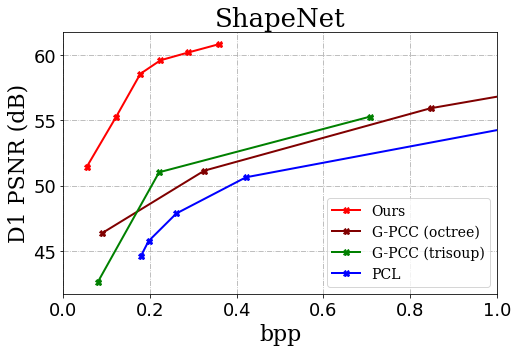

In [45]:
fig, ax = plt.subplots(figsize=(7.3,5))

A= plt.plot(learnedpcgc['bpp'], learnedpcgc[metric], 
            label = "Ours",color ="red",linewidth=2, marker='X')
C= plt.plot(gpcc_octree['bpp'], gpcc_octree[metric], 
            label = "G-PCC (octree)",color ="#800000",linewidth=2, marker='X',)
D= plt.plot(gpcc_trisoup['bpp'], gpcc_trisoup[metric], 
            label = "G-PCC (trisoup)",color ="green",linewidth=2, marker='X',)
E= plt.plot(pcl['bpp'], pcl[metric], 
            label = "PCL",color ="blue",linewidth=2, marker='X',)
# 'style':'italic',
font_label = {'family' : 'serif', 'weight' : 'normal', 'size'   : 22}
font_title = {'family' : 'serif', 'weight' : 'normal', 'size'   : 26}
font_legend = {'family' : 'serif', 'weight' : 'normal', 'size'   : 14}
ax.set_xlim([0, 1.0])
# ax.set_ylim([60, 75])
ax.locator_params(axis='x', nbins=8)

plt.tick_params(labelsize=18)
plt.xlabel("bpp",font_label)
plt.ylabel(ylabel,font_label)
plt.title(dataname, font_title)
plt.grid(ls='-.')
plt.legend(prop = font_legend, loc='lower right')
ax.locator_params(axis='x', nbins=8)

fig.tight_layout()
fig.savefig('./results/' + dataname + ylabel.split(' ')[0] + '.pdf')

In [46]:
from myutils import bdrate_metrics

def points_for_bdrate(df, index_rate='bpp', index_psnr='mseF,PSNR (p2point)'):
    rate = df[index_rate]
    psnr = df[index_psnr]
    rd_points = [tuple((a, b)) for a, b in zip(rate, psnr)]
    return rd_points

In [47]:
rd_points_learnedpcgc = points_for_bdrate(learnedpcgc, 'bpp', metric1)
# rd_points_learnedpcgc_f = points_for_bdrate(learnedpcgc_f, 'bpp', metric)
rd_points_gpcc_octree = points_for_bdrate(gpcc_octree, 'bpp', metric)
rd_points_gpcc_trisoup = points_for_bdrate(gpcc_trisoup, 'bpp', metric)
# rd_points_vpcc = points_for_bdrate(vpcc, 'geometry bpp', metric)
rd_points_pcl = points_for_bdrate(pcl, 'bpp', metric)

In [48]:
bdrate_octree = round(bdrate_metrics.bdrate(rd_points_gpcc_octree, rd_points_learnedpcgc),2)
print('octree', bdrate_octree)
try:
    bdrate_trisoup = round(bdrate_metrics.bdrate(rd_points_gpcc_trisoup, rd_points_learnedpcgc),2)
except:
    print('LinAlgError')
    bdrate_trisoup=0
print('trisoup', bdrate_trisoup)
bdrate_pcl = round(bdrate_metrics.bdrate(rd_points_pcl, rd_points_learnedpcgc),2)
print('pcl', bdrate_pcl)
print(dataname)

octree -84.63
trisoup -78.7
pcl -88.76
ShapeNet


/home/ubuntu/anaconda3/envs/tf13/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.


In [49]:
shapenet_bdrates_octree_d1 =  -84.63
shapenet_bdrates_trisoup_d1 =  -78.7
shapenet_bdrates_pcl_d1 = -88.76

shapenet_bdrates_octree_d2 =    -79.57
shapenet_bdrates_trisoup_d2 =  -82.44 
shapenet_bdrates_pcl_d2 =  -86.21

modelnet_bdrates_octree_d1 =    -84.03
modelnet_bdrates_trisoup_d1 =  -80.06
modelnet_bdrates_pcl_d1 =  -88.93

modelnet_bdrates_octree_d2 = -78.09
modelnet_bdrates_trisoup_d2 = -79.68
modelnet_bdrates_pcl_d2 = -85.94

#### average shapenet

In [54]:
def average_csvs(csvs):
    input_pds = [pd.read_csv(x) for x in csvs]
    rates = len(input_pds[0].index)
    metrics = input_pds[0].columns
    # print(rates, metrics)
    for rate in range(rates):
        results = {}
        for i, metric in enumerate(metrics):
            results[metric] = []
            for j, input_pd in enumerate(input_pds):
                results[metric].append(input_pd[metric][rate])
            results[metric] = np.mean(results[metric])
        results = pd.DataFrame([results])
        if rate == 0:
            all_results = results.copy(deep=True)
        else:
            all_results = all_results.append(results, ignore_index=True)
    return all_results

In [55]:
shapenet_csvs = sorted(glob.glob('results/hyper/shapenet/csv/*.csv'))

results/hyper/modelnet/20_vase_0129.csv


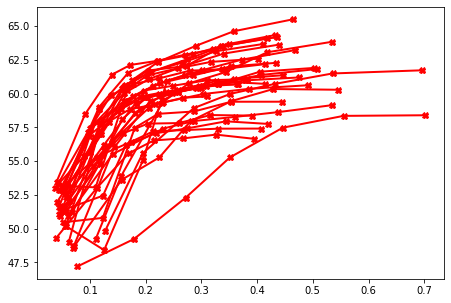

In [56]:
fig, ax = plt.subplots(figsize=(7.3,5))

for csv in pcl_csvs:
    df = pd.read_csv(csv)
    A= plt.plot(df['bpp'], df[metric], 
                label = "",color ="red",linewidth=2, marker='X')
    if df[metric][0]<48:
        print(csv)

In [57]:
shapenet_average = average_csvs(shapenet_csvs)
shapenet_average.to_csv('results/hyper/shapenet/csv/average.csv', index=False)

In [58]:
# modelnet_csvs = sorted(glob.glob('results/hyper/modelnet/csv/*.csv'))
# modelnet_average = average_csvs(modelnet_csvs)
# modelnet_average.to_csv('results/hyper/modelnet/csv/average.csv', index=False)

# shapenet_csvs = sorted(glob.glob('results/hyper/shapenet/*.csv'))
# shapenet_average = average_csvs(shapenet_csvs)
# shapenet_average.to_csv('results/hyper/shapenet/average.csv', index=False)

# modelnet_csvs = sorted(glob.glob('results/hyper/modelnet/*.csv'))
# modelnet_average = average_csvs(modelnet_csvs)
# modelnet_average.to_csv('results/hyper/modelnet/average.csv', index=False)

---
# Ablation Studies

## cube size

In [59]:
size64_results_set = sorted(
    ['results/hyper/csv/longdress_vox10_1300.csv', 
    'results/hyper/csv/loot_vox10_1200.csv',
    'results/hyper/csv/redandblack_vox10_1550.csv',
    'results/hyper/csv/soldier_vox10_0690.csv',
    'results/hyper/csv/queen_0200.csv'])

size128_results_set = sorted(
    ['results/hyper/cube128/csv/longdress_vox10_1300.csv', 
    'results/hyper/cube128/csv/loot_vox10_1200.csv',
    'results/hyper/cube128/csv/redandblack_vox10_1550.csv',
    'results/hyper/cube128/csv/soldier_vox10_0690.csv',
    'results/hyper/cube128/csv/queen_0200.csv'])

size32_results_set = sorted(
    ['results/hyper/cube32/csv/longdress_vox10_1300.csv', 
    'results/hyper/cube32/csv/loot_vox10_1200.csv',
    'results/hyper/cube32/csv/redandblack_vox10_1550.csv',
    'results/hyper/cube32/csv/soldier_vox10_0690.csv',
    'results/hyper/cube32/csv/queen_0200.csv'])

In [60]:
idx = 0

In [61]:
size128 = pd.read_csv(size128_results_set[idx])
size64 = pd.read_csv(size64_results_set[idx])
size32 = pd.read_csv(size32_results_set[idx])

In [62]:
dataname = os.path.split(size64_results_set[idx])[-1].split('.')[0].split('_')[0]
print(dataname)

longdress


In [63]:
metric = 'optimal D1 PSNR'
ylabel = "D1 PSNR (dB)"
postfix = '_d1'

# metric = 'optimal D2 PSNR'
# ylabel = "D2 PSNR (dB)"
# postfix = '_d2'

rootdir = 'results/ablation/cube_size/'
if not os.path.exists(rootdir):
    os.makedirs(rootdir)

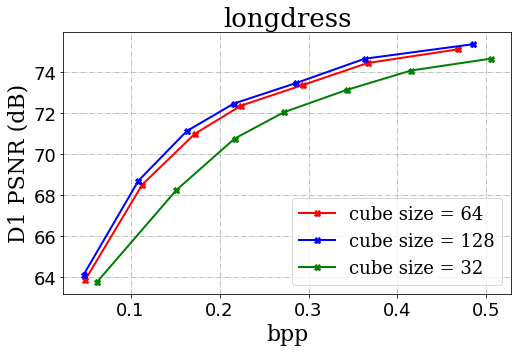

In [64]:
fig, ax = plt.subplots(figsize=(7.3,5))
A= plt.plot(size64['bpp'], size64[metric], 
            label = "cube size = 64",color ="red",
            linewidth=2, marker='X', markersize=6)
A= plt.plot(size128['bpp'], size128[metric], 
            label = "cube size = 128",color ="blue",
            linewidth=2, marker='X', markersize=6)
A= plt.plot(size32['bpp'], size32[metric], 
            label = "cube size = 32",color ="green",
            linewidth=2, marker='X', markersize=6)

# 'style':'italic',
font_label = {'family' : 'serif', 'weight' : 'normal', 'size'   : 22}
font_title = {'family' : 'serif', 'weight' : 'normal', 'size'   : 26}
font_legend = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
# ax.set_xlim([0, 2.0])
# ax.set_ylim([60, 75])
ax.locator_params(axis='x', nbins=8)

plt.tick_params(labelsize=18)
plt.xlabel("bpp",font_label)
plt.ylabel(ylabel,font_label)
plt.title(dataname, font_title)
plt.grid(ls='-.')
plt.legend(prop = font_legend, loc='lower right')

fig.tight_layout()
fig.savefig(os.path.join(rootdir, dataname+postfix+'.pdf'))

In [65]:
from myutils import bdrate_metrics

def points_for_bdrate(df, index_rate='bpp', index_psnr='mseF,PSNR (p2point)'):
    rate = df[index_rate]
    psnr = df[index_psnr]
    rd_points = [tuple((a, b)) for a, b in zip(rate, psnr)]
    return rd_points

In [66]:
rd_points_cube64 = points_for_bdrate(size64, 'bpp', metric)
rd_points_cube32 = points_for_bdrate(size32, 'bpp', metric)
rd_points_cube128 = points_for_bdrate(size128, 'bpp', metric)

bdrate = bdrate_metrics.bdrate(rd_points_cube32, rd_points_cube64)
print('32 vs 64', bdrate)
bdrate = bdrate_metrics.bdrate(rd_points_cube128, rd_points_cube64)
print('128 vs 64', bdrate)

32 vs 64 -25.212471445300654
128 vs 64 7.412255374289112


In [67]:
cube32_d1 = [-25.21, -23.39, -24.25, -18.30, -23.27]
cube128_d1 = [7.41, -5.95, -2.08, -0.60, 0.28]

cube32_d2 = [-26.99, -24.11, -25.13, -24.19, -24.66]
cube128_d2 = [7.65, -3.49, 3.22, 2.85, 2.06]

In [68]:
print(np.mean(cube32_d1), np.mean(cube32_d2))
print(np.mean(cube128_d1), np.mean(cube128_d2))

-22.883999999999997 -25.016
-0.18800000000000003 2.458


## Compression Network

In [69]:
simple_model_results_set = sorted(
    ['results/factorized/simple_model/csv/longdress_vox10_1300.csv', 
     'results/factorized/simple_model/csv/loot_vox10_1200.csv',
     'results/factorized/simple_model/csv/redandblack_vox10_1550.csv',
     'results/factorized/simple_model/csv/soldier_vox10_0690.csv',
     'results/factorized/simple_model/csv/queen_0200.csv'])

In [70]:
voxception_model_results_set = sorted(
    ['results/factorized/csv/longdress_vox10_1300.csv', 
    'results/factorized/csv/loot_vox10_1200.csv',
    'results/factorized/csv/redandblack_vox10_1550.csv',
    'results/factorized/csv/soldier_vox10_0690.csv',
    'results/factorized/csv/queen_0200.csv'])

In [71]:
hyper_model_results_set = sorted(
    ['results/hyper/csv/longdress_vox10_1300.csv', 
    'results/hyper/csv/loot_vox10_1200.csv',
    'results/hyper/csv/redandblack_vox10_1550.csv',
    'results/hyper/csv/soldier_vox10_0690.csv',
    'results/hyper/csv/queen_0200.csv'])

In [72]:
idx = 0

In [73]:
simple_model = pd.read_csv(simple_model_results_set[idx])
# simple_model_focal = pd.read_csv(simple_model_focal_results_set[idx])
voxception_model = pd.read_csv(voxception_model_results_set[idx])[1:]
hyper_model = pd.read_csv(hyper_model_results_set[idx])[1:][:-1]

In [74]:
dataname = os.path.split(hyper_model_results_set[idx])[-1].split('.')[0].split('_')[0]
print(dataname)

longdress


In [75]:
metric = 'optimal D1 PSNR'
ylabel = "D1 PSNR (dB)"
postfix = '_d1'

# metric = 'optimal D2 PSNR'
# ylabel = "D2 PSNR (dB)"
# postfix = '_d2'

rootdir = 'results/ablation/models/'
if not os.path.exists(rootdir):
    os.makedirs(rootdir)

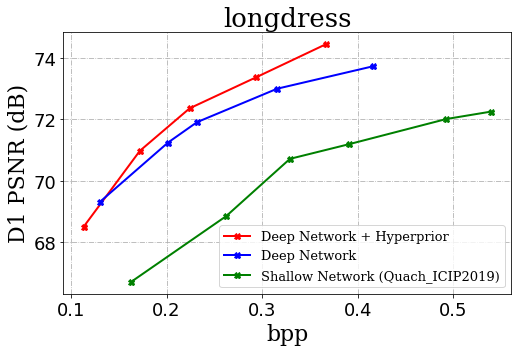

In [76]:
fig, ax = plt.subplots(figsize=(7.3,5))
A= plt.plot(hyper_model['bpp'], hyper_model[metric], 
            label = "Deep Network + Hyperprior",color ="red",
            linewidth=2, marker='X', markersize=6)
B= plt.plot(voxception_model['bpp'], voxception_model[metric], 
            label = "Deep Network",color ="blue",linewidth=2, marker='X', markersize=6)
C= plt.plot(simple_model['bpp'], simple_model[metric], 
            label = "Shallow Network (Quach_ICIP2019)",color ="green",
            linewidth=2, marker='X', markersize=6)
# D= plt.plot(simple_model_focal['bpp'], simple_model_focal[metric], 
#             label = "Shallow Network with Focal Loss (Quach_ICIP2019)",color ="black",
#             linewidth=2, marker='X', markersize=6)

# 'style':'italic',
font_label = {'family' : 'serif', 'weight' : 'normal', 'size'   : 22}
font_title = {'family' : 'serif', 'weight' : 'normal', 'size'   : 26}
font_legend = {'family' : 'serif', 'weight' : 'normal', 'size'   : 13}
# ax.set_xlim([0, 2.0])
# ax.set_ylim([60, 75])
ax.locator_params(axis='x', nbins=8)

plt.tick_params(labelsize=18)
plt.xlabel("bpp",font_label)
plt.ylabel(ylabel,font_label)
plt.title(dataname, font_title)
plt.grid(ls='-.')
plt.legend(prop = font_legend, loc='lower right')

fig.tight_layout()
fig.savefig(os.path.join(rootdir, dataname+postfix+'.pdf'))

In [77]:
from myutils import bdrate_metrics

def points_for_bdrate(df, index_rate='bpp', index_psnr='mseF,PSNR (p2point)'):
    rate = df[index_rate]
    psnr = df[index_psnr]
    rd_points = [tuple((a, b)) for a, b in zip(rate, psnr)]
    return rd_points

In [78]:
rd_points_simple = points_for_bdrate(simple_model, 'bpp', metric)
rd_points_deep = points_for_bdrate(voxception_model, 'bpp', metric)
rd_points_hyper = points_for_bdrate(hyper_model, 'bpp', metric)

bdrate = bdrate_metrics.bdrate(rd_points_simple, rd_points_deep)
print('deep', bdrate)
bdrate = bdrate_metrics.bdrate(rd_points_deep, rd_points_hyper)
print('hyper', bdrate)

deep -49.09781389390956
hyper -11.8356320638212


In [79]:
deep_d1 = [-49.09, -45.41, -48.46, -43.65, -42.53]
hyper_d1 = [-11.83, -16.86, -6.00, -20.68, -18.23]

deep_d2 = [-46.83, -47.13, -44.32, -44.47, -42.75]
hyper_d2 = [-6.76, -5.63, -4.12, -11.60, -10.41]

In [80]:
print(np.mean(deep_d1), np.mean(hyper_d1))
print(np.mean(deep_d2), np.mean(hyper_d2))

-45.828 -14.719999999999999
-45.1 -7.703999999999999


## scaling

In [81]:
# scale1_result = 'results/hyper/lowbit/csv/longdress_vox10_1300.csv'
# scale58_result = 'results/hyper/scaling58/csv/longdress_vox10_1300.csv'

scale1_results = sorted(glob.glob('results/hyper/sparse/scale1/csv/*.csv'))
scale075_results = sorted(glob.glob('results/hyper/sparse/scale075/csv/*.csv'))
scale05_results = sorted(glob.glob('results/hyper/sparse/scale05/csv/*.csv'))
scale025_results = sorted(glob.glob('results/hyper/sparse/scale025/csv/*.csv'))
scale0375_results = sorted(glob.glob('results/hyper/sparse/scale0375/csv/*.csv'))
scale0125_results = sorted(glob.glob('results/hyper/sparse/scale0125/csv/*.csv'))

In [82]:
idx = 0

In [83]:
scale1_result= scale1_results[idx]
scale075_result= scale075_results[idx]
scale05_result= scale05_results[idx]
scale0375_result= scale0375_results[idx]
scale025_result= scale025_results[idx]
scale0125_result= scale0125_results[idx]

In [84]:
print(scale1_result, '\n',
     scale075_result, '\n',
     scale05_result, '\n',
     scale0375_result, '\n',
     scale025_result, '\n',
     scale0125_result, '\n',)

results/hyper/sparse/scale1/csv/Facade_00009_vox12.csv 
 results/hyper/sparse/scale075/csv/Facade_00009_vox12.csv 
 results/hyper/sparse/scale05/csv/Facade_00009_vox12.csv 
 results/hyper/sparse/scale0375/csv/Facade_00009_vox12.csv 
 results/hyper/sparse/scale025/csv/Facade_00009_vox12.csv 
 results/hyper/sparse/scale0125/csv/Facade_00009_vox12.csv 



In [85]:
# scale1 = pd.read_csv(scale1_result)[:-1]
# scale58 = pd.read_csv(scale58_result)[:-1]

scale1 = pd.read_csv(scale1_result)[:]
scale075 = pd.read_csv(scale075_result)[:]
scale05 = pd.read_csv(scale05_result)[:]
scale025 = pd.read_csv(scale025_result)[:]
scale0375 = pd.read_csv(scale0375_result)[:] 
scale0125 = pd.read_csv(scale0125_result)[:]

In [86]:
metric = 'optimal D1 PSNR'
metric1 = 'mseF,PSNR (p2point)'
ylabel = "D1 PSNR (dB)"
postfix = '_d1'

# metric = 'optimal D2 PSNR'
# metric1 = 'mseF,PSNR (p2plane)'
# ylabel = "D2 PSNR (dB)"
# postfix = '_d2'

rootdir = 'results/ablation/scaling/'
if not os.path.exists(rootdir):
    os.makedirs(rootdir)

In [87]:
# dataname = os.path.split(scale1_results)[-1].split('.')[0].split('_')[0]
# print(dataname)
dataname = os.path.split(scale1_result)[-1].split('.')[0].split('_')[0]
print(dataname)

Facade


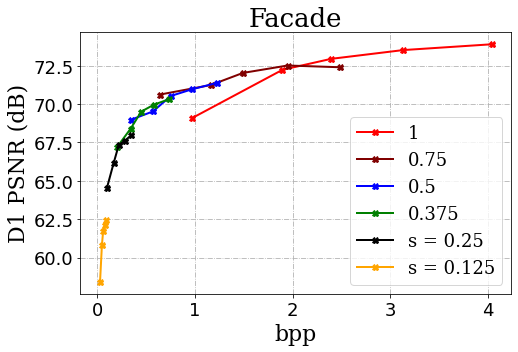

In [88]:
fig, ax = plt.subplots(figsize=(7.3,5))

# A= plt.plot(scale1['bpp'], scale1[metric], 
#             label = "1",color ="red",
#             linewidth=2, marker='X', markersize=6)
# B= plt.plot(scale58['bpp'], scale58[metric], 
#             label = "0.625",color ="blue",
#             linewidth=2, marker='X', markersize=6)

A= plt.plot(scale1['bpp'], scale1[metric], 
            label = "1",color ="red",
            linewidth=2, marker='X', markersize=6)
B= plt.plot(scale075['bpp'], scale075[metric], 
            label = "0.75",color ="#800000",
            linewidth=2, marker='X', markersize=6)
A= plt.plot(scale05['bpp'], scale05[metric], 
            label = "0.5",color ="blue",
            linewidth=2, marker='X', markersize=6)
B= plt.plot(scale0375['bpp'], scale0375[metric], 
            label = "0.375",color ="green",
            linewidth=2, marker='X', markersize=6)
B= plt.plot(scale025['bpp'], scale025[metric], 
            label = "s = 0.25",color ="black",
            linewidth=2, marker='X', markersize=6)
B= plt.plot(scale0125['bpp'], scale0125[metric], 
            label = "s = 0.125",color ="orange",
            linewidth=2, marker='X', markersize=6)

# 'style':'italic',
font_label = {'family' : 'serif', 'weight' : 'normal', 'size'   : 22}
font_title = {'family' : 'serif', 'weight' : 'normal', 'size'   : 26}
font_legend = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
# ax.set_xlim([0, 2.0])
# ax.set_ylim([60, 75])
ax.locator_params(axis='x', nbins=8)

plt.tick_params(labelsize=18)
plt.xlabel("bpp",font_label)
plt.ylabel(ylabel,font_label)
plt.title(dataname, font_title)
plt.grid(ls='-.')
plt.legend(prop = font_legend, loc='lower right')

fig.tight_layout()
fig.savefig(os.path.join(rootdir, dataname+postfix+'.pdf'))

## rho

In [89]:
rate1_results = 'results/hyper/csv/longdress/csv/longdress_vox10_13001132bpp.csv'
rate2_results = 'results/hyper/csv/longdress/csv/longdress_vox10_1300bpp1721.csv'
rate3_results = 'results/hyper/csv/longdress/csv/longdress_vox10_1300bpp2243.csv'
rate4_results = 'results/hyper/csv/longdress/csv/longdress_vox10_1300bpp2939.csv'
rate5_results = 'results/hyper/csv/longdress/csv/longdress_vox10_1300bpp3667.csv'
rate6_results = 'results/hyper/csv/longdress/csv/longdress_vox10_1300bpp4681.csv'

In [90]:
rate1 = pd.read_csv(rate1_results)[5:][:-5]
rate2 = pd.read_csv(rate2_results)[5:][:-5]
rate3 = pd.read_csv(rate3_results)[5:][:-5]
rate4 = pd.read_csv(rate4_results)[5:][:-5]
rate5 = pd.read_csv(rate5_results)[5:][:-5]
rate6 = pd.read_csv(rate6_results)[5:][:-5]

In [91]:
metric = 'mseF,PSNR (p2point)'
postfix = '_d1'
ylabel = "D1 PSNR (dB)"

# metric = 'mseF,PSNR (p2plane)'
# postfix = '_d2'
# ylabel = "D2 PSNR (dB)"

In [92]:
dataname = os.path.split(rate1_results)[-1].split('.')[0].split('_')[0]
print(dataname)

longdress


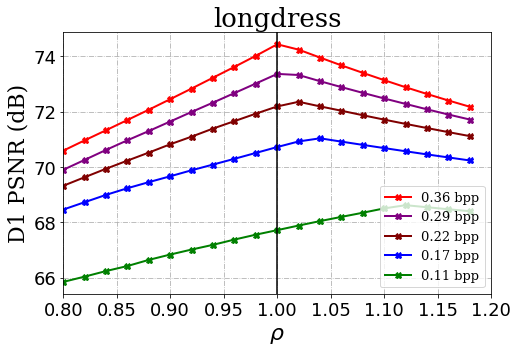

In [93]:
fig, ax = plt.subplots(figsize=(7.3,5))
# A= plt.plot(rate6['rho'], rate6[metric], label = "0.46bpp",color ="blue", 
#             linewidth=2, marker='X', markersize=6)
A= plt.plot(rate5['rho'], rate5[metric], label = "0.36 bpp",color ="red", 
            linewidth=2, marker='X', markersize=6)
A= plt.plot(rate4['rho'], rate4[metric], label = "0.29 bpp",color ="purple", 
            linewidth=2, marker='X', markersize=6)
A= plt.plot(rate3['rho'], rate3[metric], label = "0.22 bpp",color ="#800000", 
            linewidth=2, marker='X', markersize=6)
A= plt.plot(rate2['rho'], rate2[metric], label = "0.17 bpp",color ="blue", 
            linewidth=2, marker='X', markersize=6)
A= plt.plot(rate1['rho'], rate1[metric], label = "0.11 bpp",color ="green", 
            linewidth=2, marker='X', markersize=6)
# 'style':'italic',
font_label = {'family' : 'serif', 'weight' : 'normal', 'size'   : 22}
font_title = {'family' : 'serif', 'weight' : 'normal', 'size'   : 26}
font_legend = {'family' : 'serif', 'weight' : 'normal', 'size'   : 13}
ax.set_xlim([0.8, 1.2])
# ax.set_ylim([68, 79])
ax.locator_params(axis='x', nbins=10)

plt.tick_params(labelsize=18)
plt.xlabel(r"$\rho$",font_label)
plt.ylabel(ylabel,font_label)
plt.title(dataname, font_title)
plt.grid(ls='-.')
plt.legend(prop = font_legend, loc='lower right')
plt.axvline(x=1.0, ls="-",c="black")
fig.tight_layout()

rootdir = 'results/ablation/rho/'
if not os.path.exists(rootdir):
    os.makedirs(rootdir)
    
fig.savefig(os.path.join(rootdir, dataname+postfix+'.pdf'))

## threshold

In [94]:
adaptive_thres_results_set = sorted(
    ['results/hyper/csv/longdress_vox10_1300.csv', 
    'results/hyper/csv/loot_vox10_1200.csv',
    'results/hyper/csv/redandblack_vox10_1550.csv',
    'results/hyper/csv/soldier_vox10_0690.csv',
    'results/hyper/csv/queen_0200.csv'])
fixed_thres_results_set = sorted(
    ['results/hyper/fixed_thres/csv/longdress_vox10_1300.csv', 
    'results/hyper/fixed_thres/csv/loot_vox10_1200.csv',
    'results/hyper/fixed_thres/csv/redandblack_vox10_1550.csv',
    'results/hyper/fixed_thres/csv/soldier_vox10_0690.csv',
    'results/hyper/fixed_thres/csv/queen_0200.csv'])

In [95]:
idx = 0

In [96]:
adaptive_thres = pd.read_csv(adaptive_thres_results_set[idx])[:-1]
fixed_thres = pd.read_csv(fixed_thres_results_set[idx])[:-1]

In [97]:
metric = 'optimal D1 PSNR'
metric1 = 'mseF,PSNR (p2point)'
ylabel = "D1 PSNR (dB)"
postfix = '_d1'

# metric = 'optimal D2 PSNR'
# metric1 = 'mseF,PSNR (p2plane)'
# ylabel = "D2 PSNR (dB)"
# postfix = '_d2'

rootdir = 'results/ablation/threshold/'
if not os.path.exists(rootdir):
    os.makedirs(rootdir)

In [98]:
dataname = os.path.split(adaptive_thres_results_set[idx])[-1].split('.')[0].split('_')[0]
print(dataname)

longdress


In [99]:
metric1

'mseF,PSNR (p2point)'

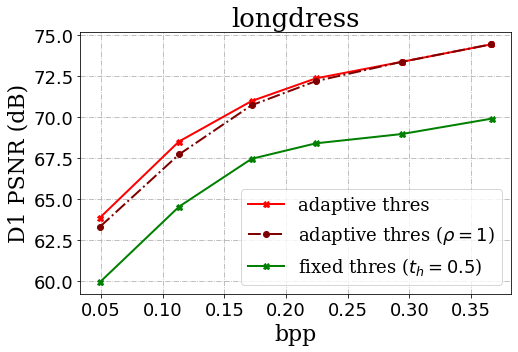

In [100]:
fig, ax = plt.subplots(figsize=(7.3,5))
A= plt.plot(adaptive_thres['bpp'], adaptive_thres[metric], 
            label = "adaptive thres",color ="red",
            linewidth=2, marker='X', markersize=6)
B= plt.plot(adaptive_thres['bpp'], adaptive_thres[metric1], 
            label = r"adaptive thres ($\rho=1$)",color ="#800000",
            linewidth=2, marker='o', markersize=6, linestyle='-.')
C= plt.plot(fixed_thres['bpp'], fixed_thres[metric1], 
            label = r"fixed thres ($t_h=0.5$)",color ="green",
            linewidth=2, marker='X', markersize=6)

# 'style':'italic',
font_label = {'family' : 'serif', 'weight' : 'normal', 'size'   : 22}
font_title = {'family' : 'serif', 'weight' : 'normal', 'size'   : 26}
font_legend = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
# ax.set_xlim([0, 2.0])
# ax.set_ylim([60, 75])
ax.locator_params(axis='x', nbins=8)

plt.tick_params(labelsize=18)
plt.xlabel("bpp",font_label)
plt.ylabel(ylabel,font_label)
plt.title(dataname, font_title)
plt.grid(ls='-.')
plt.legend(prop = font_legend, loc='lower right')

fig.tight_layout()
fig.savefig(os.path.join(rootdir, dataname+postfix+'.pdf'))

In [101]:
from myutils import bdrate_metrics

def points_for_bdrate(df, index_rate='bpp', index_psnr='mseF,PSNR (p2point)'):
    rate = df[index_rate]
    psnr = df[index_psnr]
    rd_points = [tuple((a, b)) for a, b in zip(rate, psnr)]
    return rd_points

In [102]:
metric

'optimal D1 PSNR'

In [103]:
rd_points_optimal = points_for_bdrate(adaptive_thres, 'bpp', metric)
rd_points_adaptive = points_for_bdrate(adaptive_thres, 'bpp', metric1)
rd_points_fixed = points_for_bdrate(fixed_thres, 'bpp', metric1)

bdrate = bdrate_metrics.bdrate(rd_points_fixed, rd_points_adaptive)
print('adpative vs fixed', bdrate)
bdrate = bdrate_metrics.bdrate(rd_points_adaptive, rd_points_optimal)
print('optimal vs adaptive', bdrate)
bdrate = bdrate_metrics.bdrate(rd_points_fixed, rd_points_optimal)
print('optimal vs fixed', bdrate)

adpative vs fixed -43.75739092898516
optimal vs adaptive -8.32848237393896
optimal vs fixed -50.43048063740129


In [104]:
adaptive_d1 = [-43.75, -42.26,  -55.17,  -36.51, -40.81]
optimal_d1 = [-8.32,  -10.45,  -5.29, -13.28,  -10.57]
optimal_fixed_d1 = [-50.43, -51.35,  -59.22,  -49.19,  -50.03]

adaptive_d2 = [-53.28, -53.75,  -59.11,  -55.82,  -52.88]
optimal_d2 = [-7.22,  -7.05,  -6.44,  -9.11,  -7.28]
optimal_fixed_d2 = [-57.82, -57.71, -63.19,  -61.06,  -57.34]

In [105]:
print(np.mean(adaptive_d1), np.mean(optimal_d1), np.mean(optimal_fixed_d1))
print(np.mean(adaptive_d2), np.mean(optimal_d2), np.mean(optimal_fixed_d2))

-43.7 -9.581999999999999 -52.044000000000004
-54.967999999999996 -7.42 -59.424
